<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/OpenCV_ColorSpace_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images/'
vegPath=root_path+"/capsicum.jpg"

Mounted at /content/gdrive


In [3]:
image= cv2.imread(vegPath, 1)
if ( image.any() == None):
    print("file not detected")
else:
    print("file detected")
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

file detected


Text(0.5, 1.0, 'Original Image')

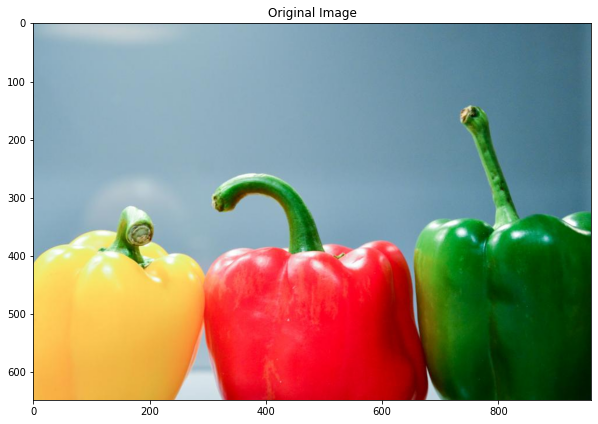

In [4]:
plt.imshow(image[:,:,::-1])
plt.title("Original Image")

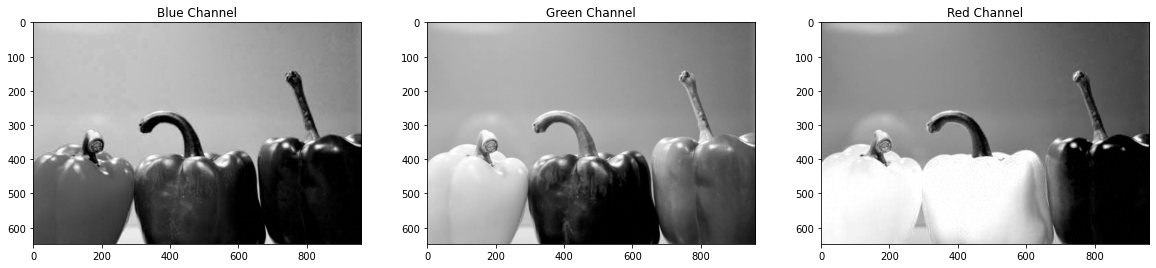

In [5]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(image[:,:,0],cmap='gray')
plt.title("Blue Channel");
plt.subplot(132)
plt.imshow(image[:,:,1],cmap='gray')
plt.title("Green Channel");
plt.subplot(133)
plt.imshow(image[:,:,2],cmap='gray')
plt.title("Red Channel");

###In the above figure, it can be seen that the red color (middle pepper) displays high intensity ( bright color) only in the R channel whereas the yellow color (left pepper) has high intensity values in both R and G channels which can be attributed to the additive property of the color space (yellow is a mixture of red and green).

In the RGB color space, all three channels contain information about the color as well as brightness. It is better for some applications if we can separate the color component, also known as Chrominance , from the lightness or brightness component also known as Luminance. This separation is present in the other color spaces we will talk about next.

This is one of the most popular color spaces used in image processing after the RGB color space. Its three components are :

Hue - indicates the color / tint of the pixel

Saturation - indicates the purity (or richness) of the color

Value - indicates the amount of brightness of the pixel

The HSV color space converts the RGB color space from cartesian coordinates (x, y, z) to cylindrical coordinates (ρ, φ, z). It is more intuitive than the RGB color space because it separates the color and brightness into different axes. This makes it easier for us to describe any color directly.

In [6]:
# convert from bgr to HSV format
hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

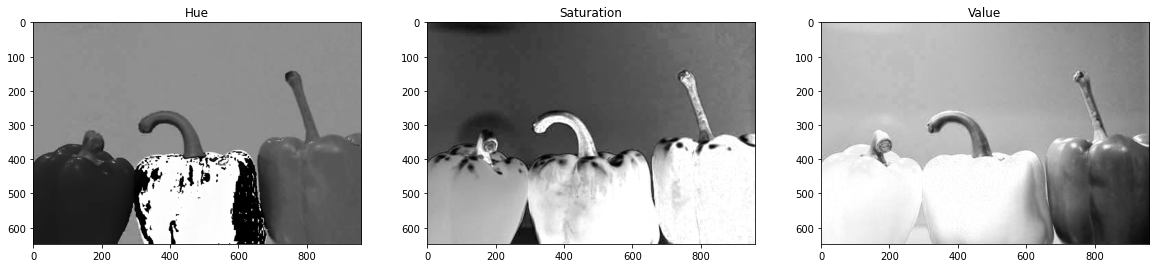

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(hsvImage[:,:,0],cmap='gray')
plt.title("Hue");
plt.subplot(132)
plt.imshow(hsvImage[:,:,1],cmap='gray')
plt.title("Saturation");
plt.subplot(133)
plt.imshow(hsvImage[:,:,2],cmap='gray')
plt.title("Value");

Hue 
The Hue channel refers to the color and its values, ranging from 0 to 180 in OpenCV. Since the HSV color space is represented in a cylindrical coordinate system, the values for Hue wrap around 180. For example, the Hue for red color is near 180. So, some tints of red can wrap around 180 and have values around 0. This is evident from the middle (red) pepper in the figure above, which shows both very high (180) and low (0) Hue values for the red pepper.

Saturation 
Saturation refers to how pure the color is. Pure red has high saturation. Different shades of a color correspond to different saturation levels. Saturation of 0 corresponds to white color which indicates that the color shade is at the lowest or the color is simply absent.

So, in the figure above, we can see that the green and red peppers are highly saturated, i.e. these colors are in their purest form. On the other hand, the yellow pepper has relatively lower saturation. With the Hue and Saturation channels known, we have a better idea about the color and tints or shades of color in our image.

Value 
Value refers to lightness or brightness. It indicates how dark or bright the color is. It also signifies the amount of light that might have fallen on the object. It is pretty clear from the original image and the Value channel that the red and yellow peppers are much brighter as compared to the green pepper.

We will see two simple applications using the HSV color space in the next section.

Understanding the the HSV color space
The easiest way to understand the HSV color space to create an HSV image from scratch and study its properties after converting it to the RGB color space.

Let's do a few experiments.

Value Test
The first experiment is to create an HSV image where H, S, and V components are all 0 in the begining. We will then keep the H and S components constant at 0, and vary the V (value) component. We then convert the image to RGB color space to see what effect changing the value has to the perception of color.

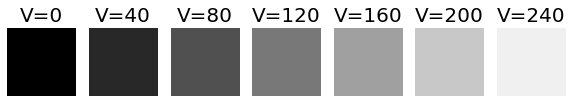

In [21]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = 0, Value = i x 40
    v = i * 40
    imhsv[:,:,:] = (0, 0, v)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('V='+ str(v), fontdict={'fontsize': 20, 'fontweight': 'medium'})

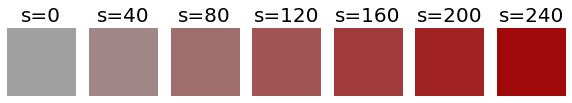

In [25]:
# Saturation test. 
# Set brightness to 128, hue to 0, and change saturation

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
v=160
for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = i * 40, Value = v
    s = i * 40
    imhsv[:,:,:] = (0, s, v)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('s='+ str(s), fontdict={'fontsize': 20, 'fontweight': 'medium'})

In [ ]:
Hue Test
In this test, we will set S and V to 128, and vary the Hue from 0 to 180.

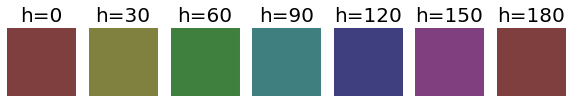

In [32]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
s=128
v=128
for i in range(0,7):
    # Create 50x50 HSV image with all zeros
    imhsv = np.zeros((50, 50, 3), dtype=np.uint8)
    
    # Set Hue = 0, Saturation = i * 40, Value = v
    h = i * 30
    imhsv[:,:,:] = (h,s,v)
    
    # Convert HSV to RGB
    imrgb = cv2.cvtColor(imhsv, cv2.COLOR_HSV2RGB)

    # Display image
    ax = plt.subplot(1, 7, i+1)
    plt.imshow(imrgb)
    plt.axis('off')
    ax.set_title('h='+ str(h), fontdict={'fontsize': 20, 'fontweight': 'medium'})

Conclusion : Hue controls the perception of color. It is represented as an angle where a hue of 0 is red, green is 120 degrees ( 60 in OpenCV ), and blue is at 240 degrees( 120 in OpenCV ). In OpenCV, Hue is goes from 0 to 180 intensities values where one grayscale intensity change represents 2 degrees.

Because hue is angle, you get red color for both H = 0 and H = 360 ( or 180 in OpenCV's representation )